# Step 1: Reading and Understanding the Data
Let's start with the following step:

- Importing data using the pandas library
- Understanding the structure of the data

In [420]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [421]:
# Import numpy and pandas

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [422]:
# Read the given CSV file

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [423]:
# Checking the shape of the dataframe
bike.shape

(730, 16)

In [424]:
# Checking the summary
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [425]:
# Checking the datatypes of each column
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Checking for missing values

In [426]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There is no missing values in the dataset

#### Checking for duplicate values

In [427]:
# Creating a copy of original dataframe for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

#### The shape after running the drop duplicate command is same as the original dataframe. Hence there are no duplicate values in the dataset.

### Removing Columns that are unnecessary

#### 1. instant: It is only an index value
#### 2. dteday: This has the date value, since we already have separate columns for 'year' & 'month' we can delete it. We found that the total bike rental 'cnt = 'casual' + 'registered'.  We are interested in 'cnt' only, so we can delete them.

In [428]:
### dropping the columns

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

# Step 2: Encoding & Visualizing the data

### Encoding Categorical columns
Converting season, mnth,weathersit and weekday to categorical columns

- season: converting season values as per criteria - `1:Spring`, `2:Summer`, `3:Fall`, `4:Winter`
- mnth: converting mnth values as `1:Jan`, `2:Feb`, `3:Mar`, `4:Apr`, `5:May`, `6:Jun`, `7:Jul`, `8:Aug`, `9:Sep`, `10:Oct`, `11:Nov`, `12:Dec`
- weathersit: converting weathersit values as `1:Clear`, `2:Mist + Cloudy`, `3:Light_Rain+Snow`, `4:Heavy_Rain+Snow`
- weekday: converting weekday values as `0:Sun`, `1:Mon`, `2:Tue`, `3:Wed`, `4:Thu`, `5:Fri`, `6:Sat`

#### Converting season

In [429]:
bike['season'].replace({1:"Spring",2:"Summer",3:"Fall",4:"Winter"},inplace=True)
bike.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

#### Converting mnth

In [430]:
bike['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'},inplace=True)

bike.mnth.value_counts()

Oct    62
May    62
Mar    62
Aug    62
Jul    62
Dec    62
Jan    62
Nov    60
Jun    60
Sep    60
Apr    60
Feb    56
Name: mnth, dtype: int64

#### Converting weathersit

In [431]:
bike['weathersit'].replace({1:"Clear",2:"Mist + Cloudy",3:"Light_Rain+Snow",4:'Heavy_Rain+Snow'},inplace=True)
bike.weathersit.value_counts()

Clear              463
Mist + Cloudy      246
Light_Rain+Snow     21
Name: weathersit, dtype: int64

#### Converting weekday

In [432]:
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike.weekday.value_counts()

Monday       105
Tuesday      105
Saturday     104
Thursday     104
Friday       104
Sunday       104
Wednesday    104
Name: weekday, dtype: int64

In [433]:
# visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Categorical Variable Analysis

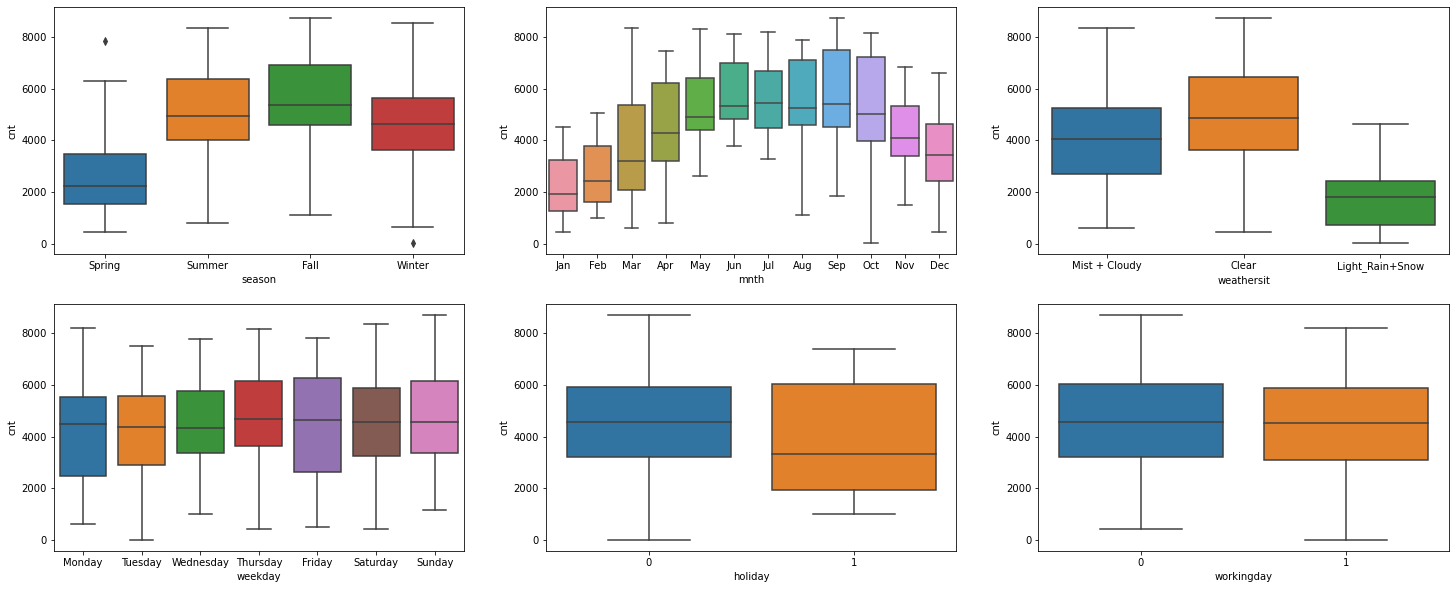

In [434]:
# Build boxplot of all categorical variables againt the target variable 'cnt'.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#### Creating a summary & Visualizing `season` variable

In [435]:
## Creating a summary
df_A = bike.groupby("season")['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
df_A['sum_perc']=df_A['sum']/bike.cnt.sum()*100
df_A['count_perc']=df_A['count']/bike.cnt.count()*100
df_A

,sum,mean,count,sum_perc,count_perc
season,,,,,
Fall,1061129,5644.303191,188,32.244879,25.753425
Summer,918589,4992.331522,184,27.913469,25.205479
Winter,841613,4728.162921,178,25.574374,24.383562
Spring,469514,2608.411111,180,14.267278,24.657534


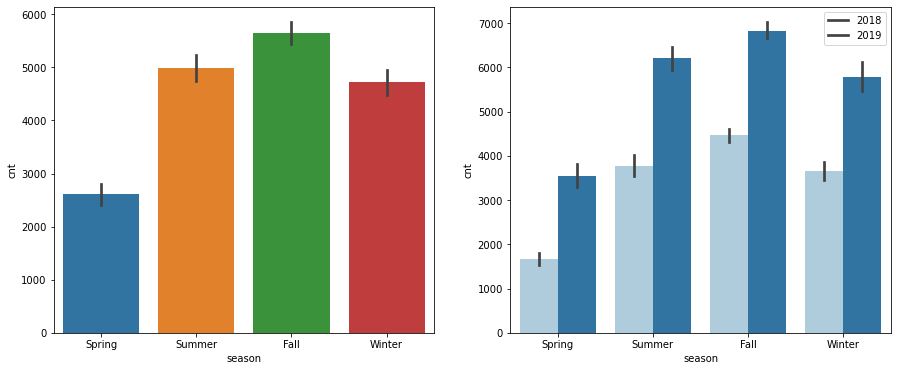

In [436]:
## Creating a barplot for the variable season and also w.r.t. the diff. years.
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot('season','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('season','cnt',data=bike, hue='yr',palette='Paired')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Inference: 
- 1. Almost 32% of the bookings happened in Fall with a median of over 5500 bookings (for two years). It is followed by Summer & Winter with 27% & 25% of the total booking. 
- 2. We can observe that there is a major increase in the total bookings in 2019 compared to 2018.

#### Creating a summary & Visualizing `mnth` variable

In [437]:
## Creating a summary
df_B = bike.groupby("mnth")['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
df_B['sum_perc']=df_B['sum']/bike.cnt.sum()*100
df_B['count_perc']=df_B['count']/bike.cnt.count()*100
df_B

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.419355,62,10.671849,8.493151
Jun,346342,5772.366667,60,10.524409,8.219178
Sep,345991,5766.516667,60,10.513743,8.219178
Jul,344948,5563.677419,62,10.482049,8.493151
May,331686,5349.774194,62,10.079053,8.493151
Oct,322352,5199.225806,62,9.795417,8.493151
Apr,269094,4484.900000,60,8.177049,8.219178
Nov,254831,4247.183333,60,7.743634,8.219178
Mar,228920,3692.258065,62,6.956268,8.493151


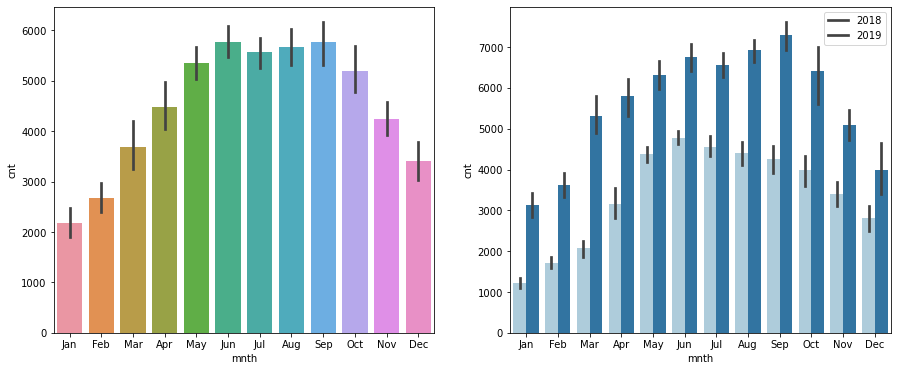

In [438]:
## Creating a barplot for the variable mnth and also w.r.t. the diff. years.
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot('mnth','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('mnth','cnt',data=bike, hue='yr',palette='Paired')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Inference:
- Almost 10% of the bike booking was happening between May to Sep with a median of over 5000 bookings per month.

#### Creating a summary & Visualizing `holiday` variable

In [439]:
## Creating a summary
df_C = bike.groupby("holiday")['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
df_C['sum_perc']=df_C['sum']/bike.cnt.sum()*100
df_C['count_perc']=df_C['count']/bike.cnt.count()*100
df_C

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.90268,709,97.61657,97.123288
1,78435,3735.00000,21,2.38343,2.876712


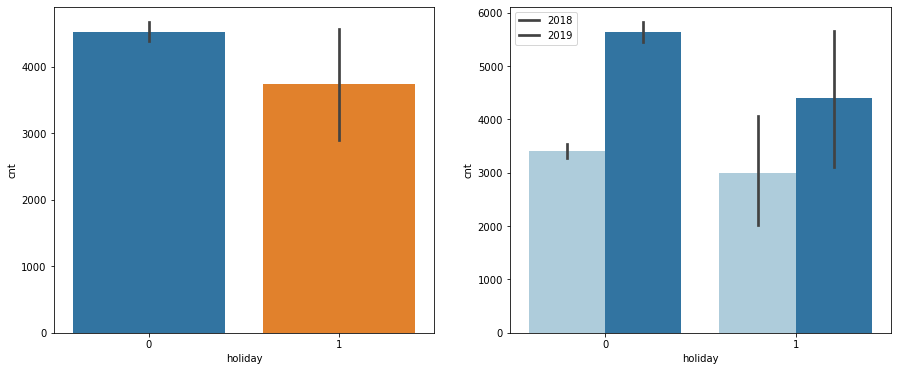

In [440]:
## Creating a barplot for the variable holiday and also w.r.t. the diff. years.
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot('holiday','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('holiday','cnt',data=bike, hue='yr',palette='Paired')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Inference:
- Almost 97% of bike rentals are happening during non-holiday time. This can be due to the fact that people tend to spend the holidays with their families.

#### Creating a summary & Visualizing `weekday` variable

In [441]:
## Creating a summary
df_D = bike.groupby("weekday")['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
df_D['sum_perc']=df_D['sum']/bike.cnt.sum()*100
df_D['count_perc']=df_D['count']/bike.cnt.count()*100
df_D

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Thursday,487923,4691.567308,104,14.826678,14.246575
Sunday,485235,4665.721154,104,14.744997,14.246575
Saturday,481176,4626.692308,104,14.621655,14.246575
Friday,478132,4597.423077,104,14.529156,14.246575
Wednesday,462276,4444.961538,104,14.047334,14.246575
Tuesday,448822,4274.495238,105,13.638503,14.383562
Monday,447281,4259.819048,105,13.591676,14.383562


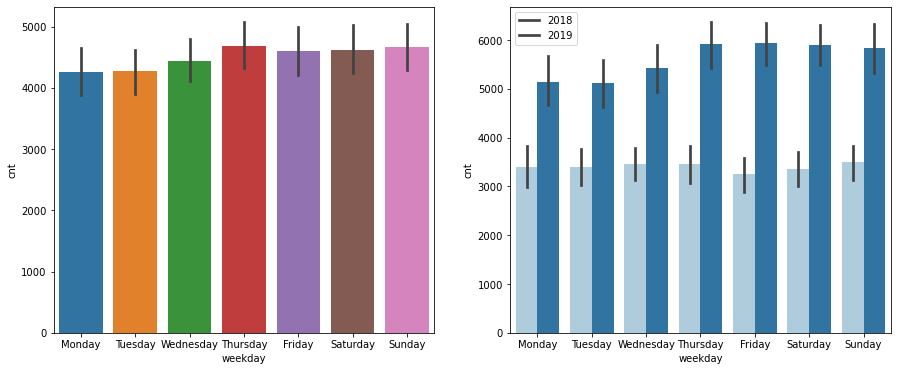

In [442]:
## Creating a barplot for the variable weekday and also w.r.t. the diff. years.
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot('weekday','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('weekday','cnt',data=bike, hue='yr',palette='Paired')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Creating a summary & Visualizing `workingday` variable

In [443]:
## Creating a summary
df_E = bike.groupby("workingday")['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
df_E['sum_perc']=df_E['sum']/bike.cnt.sum()*100
df_E['count_perc']=df_E['count']/bike.cnt.count()*100
df_E

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2253988,4472.198413,504,68.492682,69.041096
0,1036857,4587.862832,226,31.507318,30.958904


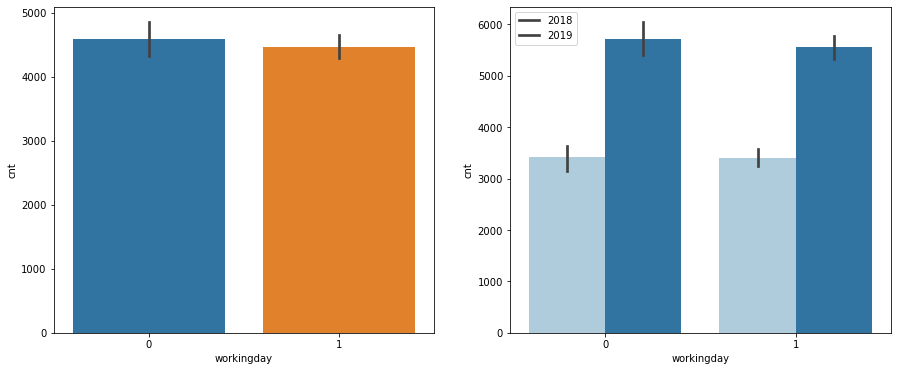

In [444]:
## Creating a barplot for the variable workingday and also w.r.t. the diff. years.
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot('workingday','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('workingday','cnt',data=bike, hue='yr',palette='Paired')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Inference:
- Almost 69% of the bookings were happening in 'workingday' with a median of close to 4500 bookings (for two years).

#### Creating a summary & Visualizing `weathersit` variable

In [445]:
## Creating a summary
df_E = bike.groupby("weathersit")['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
df_E['sum_perc']=df_E['sum']/bike.cnt.sum()*100
df_E['count_perc']=df_E['count']/bike.cnt.count()*100
df_E

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.786177,463,68.613137,63.424658
Mist + Cloudy,995024,4044.813008,246,30.236125,33.698630
Light_Rain+Snow,37869,1803.285714,21,1.150738,2.876712


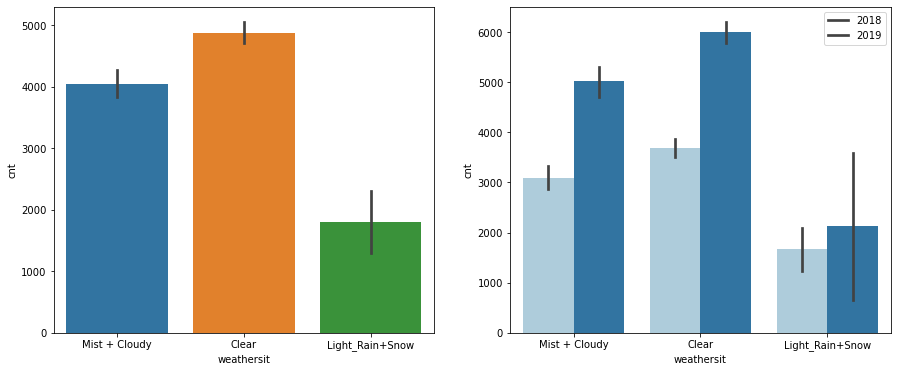

In [446]:
## Creating a barplot for the variable weathersit and also w.r.t. the diff. years.
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot('weathersit','cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot('weathersit','cnt',data=bike, hue='yr',palette='Paired')
plt.legend(labels=['2018', '2019'])
plt.show()

#### Inference:
- 1. Almost 68.6% of the bookings was happening during Clear weather with a median of close to 5000 bookings (for two years).
- 2. This was followed by Misty with 30% of the total booking. 

### Numerical Variable Analysis

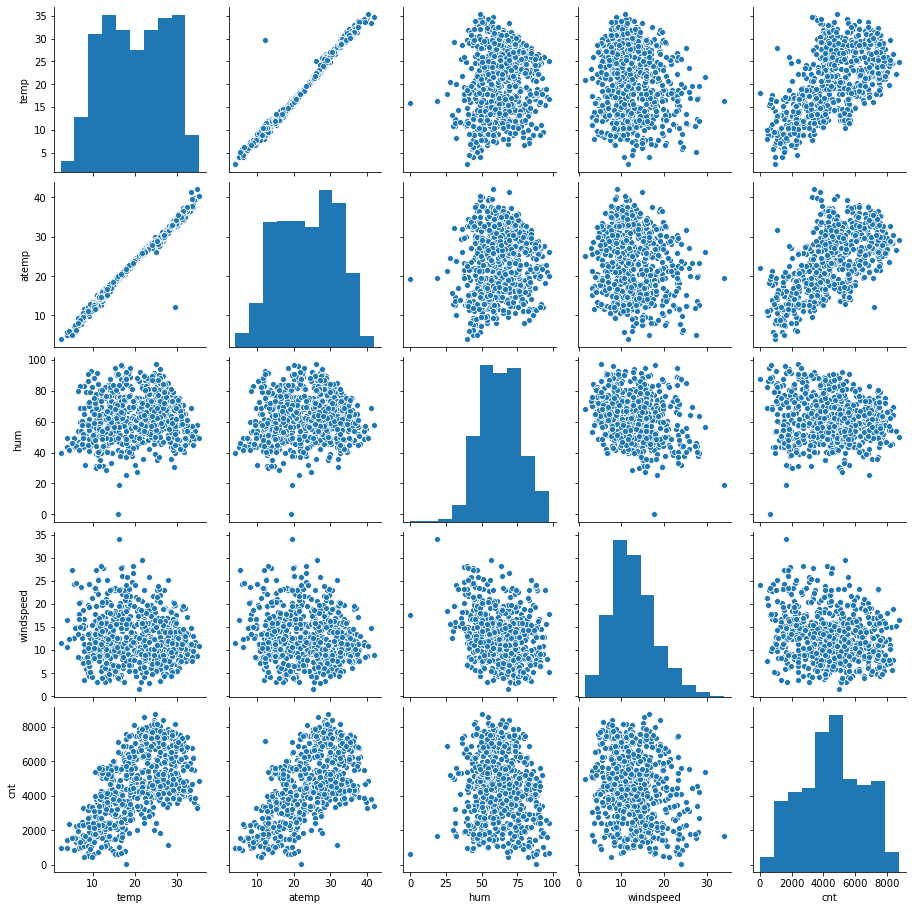

In [447]:
#Generating pairplot to check the relationships between numeric variables variables

bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

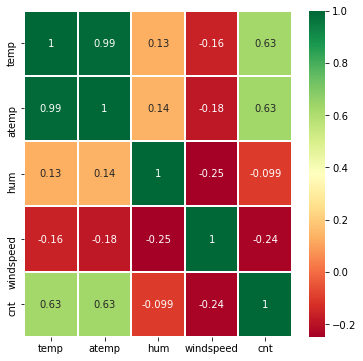

In [448]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax = sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth = 1)

#### Inference:
- 1. There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity.

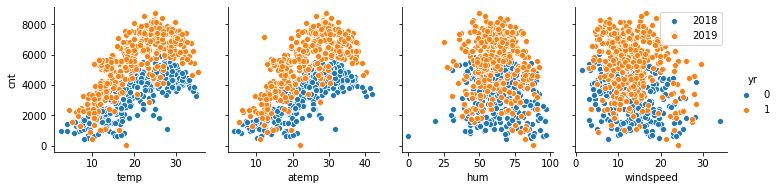

In [449]:
# Checking the impact of year against the numerical variable : 

ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

# Step 3: Data Preparation

### Creating Dummy Variables

#### Creating Dummy variables for the variable `season`

In [450]:
season = pd.get_dummies(bike['season'], drop_first = True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Creating Dummy variables for the variable `weathersit`

In [451]:
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head()

,Light_Rain+Snow,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


#### Creating Dummy variables for the variable `mnth`

In [452]:
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


#### Creating Dummy variables for the variable `weekday`

In [453]:
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


### Merging the dataframes

In [454]:
# Creating a new dataframe by merging bike dataframe with season, month, weather and weekday dataframe

bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_Rain+Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,Spring,0,Jan,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [455]:
### Checking the shape of the new dataset
bike_new.shape

(730, 34)

In [456]:
### Checking the datatype of the new dataset
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    int64  
 12  Spring           730 non-null    uint8  
 13  Summer           730 non-null    uint8  
 14  Winter           730 non-null    uint8  
 15  Aug              730 non-null    uint8  
 16  Dec              730 non-null    uint8  
 17  Feb             

In [457]:
### Removing the original columns for which we have already added the respective Dummy variables.

bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [458]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_Rain+Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets

In [459]:
import sklearn
from sklearn.model_selection import train_test_split

In [460]:
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


In [461]:
## Checking the summary of train dataset
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_Rain+Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.029412,0.345098,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.169124,0.475867,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [462]:
## Checking the summary of train dataset
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_Rain+Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescaling the Features 

In [463]:
from sklearn.preprocessing import MinMaxScaler

In [464]:
## 1. Instantiate an object
scalar = MinMaxScaler()

## create a list of mumeric variables
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

## 2. Fit on data
bike_train[num_vars] = scalar.fit_transform(bike_train[num_vars])

## checking after rescaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_Rain+Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [465]:
## checking the rescaled variable
bike_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


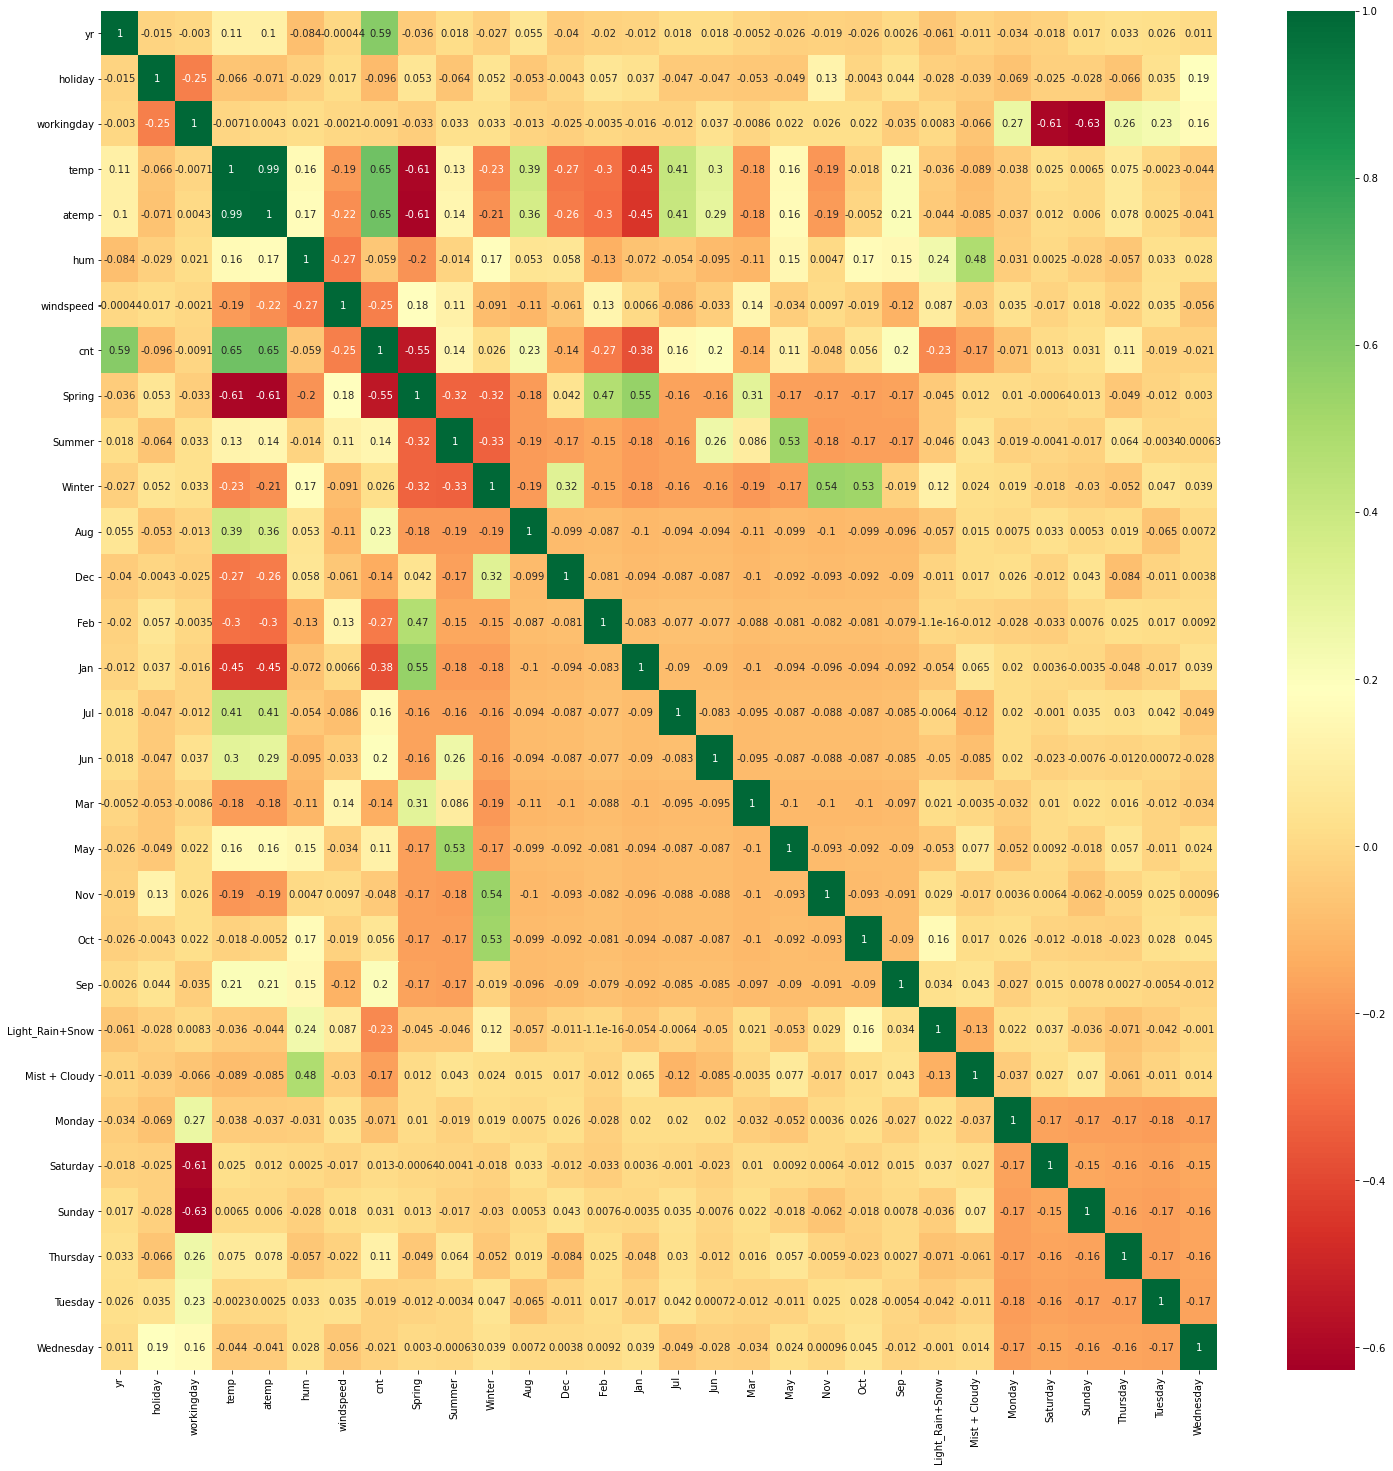

In [466]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Inference:
- There is multi-colinearity between the variables.
- 1. temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables
- 2. workingday variable has high negative correlation with Sat & Sun
- 3. temp, atemp and yr has strong correlation with cnt

### Dividing into X and Y sets for the model building

In [467]:
# X_train, y_train
y_train = bike_train.pop('cnt')
X_train = bike_train

In [468]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_Rain+Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [469]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

# Step 5: Building a linear model

### RFE
Recursive feature elimination

In [470]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [471]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)                    # running RFE
rfe = rfe.fit(X_train,y_train)

In [472]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Light_Rain+Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11)]

In [473]:
## Getting the column names
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light_Rain+Snow',
       'Mist + Cloudy'],
      dtype='object')

In [474]:
## Checking which columns have been dropped.
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [475]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [476]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [477]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   


In [478]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        19:38:54   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036      8.859      0.000       0.249       0.391
yr                  0.2304      0.008     28.487      0.000       0.215       0.246
holiday            -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                0.4815      0.037     13.005      0.000       0.409       0.554
hum                -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed          -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Spring             -0.0613      0.021     -2.881      0.004      -0.103      -0.019
Summer              0.0423      0.015      2.761      0.006       0.012       0.072
Winter              0.1019      0.018      5.656      0.000       0.067       0.137
Dec                -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan                -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul                -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov                -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep                 0.0755      0.017      4.466      0.000       0.042       0.109
Light_Rain+Snow    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy      -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF
#### Checking VIF

In [479]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.52
6,Spring,5.27
3,temp,4.42
8,Winter,3.83
7,Summer,2.77
4,hum,1.92
12,Nov,1.77
10,Jan,1.68
15,Mist + Cloudy,1.57
9,Dec,1.50


### Manual Model Development using statsmodel

### Model 1

#### Dropping `Spring` as it has a high VIF

In [480]:
X_train_new = X_train_rfe.drop(["Spring"], axis = 1)

#### Rebuilding the model without `Spring`

In [481]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [482]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [483]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          3.50e-188
Time:                        19:38:54   Log-Likelihood:                 509.94
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     495   BIC:                            -926.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2562      0.029      8.899      0.000       0.200       0.313
yr                  0.2290      0.008     28.159      0.000       0.213       0.245
holiday            -0.0946      0.026     -3.670      0.000      -0.145      -0.044
temp                0.5550      0.027     20.527      0.000       0.502       0.608
hum                -0.1742      0.038     -4.601      0.000      -0.249      -0.100
windspeed          -0.1971      0.026     -7.634      0.000      -0.248      -0.146
Summer              0.0729      0.011      6.548      0.000       0.051       0.095
Winter              0.1369      0.013     10.204      0.000       0.111       0.163
Dec                -0.0295      0.018     -1.683      0.093      -0.064       0.005
Jan                -0.0472      0.018     -2.590      0.010      -0.083      -0.011
Jul                -0.0452      0.018     -2.509      0.012      -0.081      -0.010
Nov                -0.0288      0.019     -1.548      0.122      -0.065       0.008
Sep                 0.0903      0.016      5.571      0.000       0.058       0.122
Light_Rain+Snow    -0.2402      0.027     -9.058      0.000      -0.292      -0.188
Mist + Cloudy      -0.0514      0.010     -4.906      0.000      -0.072      -0.031
==============================================================================
Omnibus:                       58.341   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.396
Skew:                          -0.649   Prob(JB):                     4.36e-27
Kurtosis:                       5.007   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [484]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.76
3,temp,2.32
7,Winter,2.09
4,hum,1.90
11,Nov,1.71
9,Jan,1.67
14,Mist + Cloudy,1.55
8,Dec,1.48
6,Summer,1.44
10,Jul,1.43


### Model 2

#### Dropping `Nov` as it has a very high p-value 

In [485]:
X_train_new = X_train_new.drop(["Nov"], axis = 1)

#### Rebuilding the model without `Nov`

In [486]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [487]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [488]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          7.91e-189
Time:                        19:38:54   Log-Likelihood:                 508.71
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     496   BIC:                            -930.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2502      0.029      8.758      0.000       0.194       0.306
yr                  0.2290      0.008     28.118      0.000       0.213       0.245
holiday            -0.0991      0.026     -3.863      0.000      -0.149      -0.049
temp                0.5624      0.027     21.111      0.000       0.510       0.615
hum                -0.1736      0.038     -4.580      0.000      -0.248      -0.099
windspeed          -0.1971      0.026     -7.621      0.000      -0.248      -0.146
Summer              0.0740      0.011      6.651      0.000       0.052       0.096
Winter              0.1263      0.012     10.926      0.000       0.104       0.149
Dec                -0.0191      0.016     -1.177      0.240      -0.051       0.013
Jan                -0.0431      0.018     -2.388      0.017      -0.079      -0.008
Jul                -0.0461      0.018     -2.556      0.011      -0.082      -0.011
Sep                 0.0930      0.016      5.760      0.000       0.061       0.125
Light_Rain+Snow    -0.2377      0.027     -8.968      0.000      -0.290      -0.186
Mist + Cloudy      -0.0511      0.010     -4.865      0.000      -0.072      -0.030
==============================================================================
Omnibus:                       55.188   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.061
Skew:                          -0.625   Prob(JB):                     4.64e-25
Kurtosis:                       4.926   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [489]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.81
3,temp,2.25
4,hum,1.90
9,Jan,1.63
7,Winter,1.55
13,Mist + Cloudy,1.55
6,Summer,1.44
10,Jul,1.43
8,Dec,1.26
12,Light_Rain+Snow,1.25


### Model 3

#### Dropping `Dec` as it has a very high p-value 

In [490]:
X_train_new = X_train_new.drop(["Dec"], axis = 1)

#### Rebuilding the model without `Dec`

In [491]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [492]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [493]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          1.04e-189
Time:                        19:38:55   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2449      0.028      8.677      0.000       0.189       0.300
yr                  0.2289      0.008     28.098      0.000       0.213       0.245
holiday            -0.0980      0.026     -3.824      0.000      -0.148      -0.048
temp                0.5715      0.026     22.407      0.000       0.521       0.622
hum                -0.1779      0.038     -4.714      0.000      -0.252      -0.104
windspeed          -0.1948      0.026     -7.551      0.000      -0.245      -0.144
Summer              0.0756      0.011      6.843      0.000       0.054       0.097
Winter              0.1248      0.011     10.859      0.000       0.102       0.147
Jan                -0.0382      0.018     -2.174      0.030      -0.073      -0.004
Jul                -0.0468      0.018     -2.594      0.010      -0.082      -0.011
Sep                 0.0944      0.016      5.858      0.000       0.063       0.126
Light_Rain+Snow    -0.2349      0.026     -8.895      0.000      -0.287      -0.183
Mist + Cloudy      -0.0504      0.010     -4.804      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       53.439   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.260
Skew:                          -0.611   Prob(JB):                     5.11e-24
Kurtosis:                       4.885   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [494]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.59
3,temp,2.06
4,hum,1.88
8,Jan,1.55
12,Mist + Cloudy,1.55
7,Winter,1.53
9,Jul,1.43
6,Summer,1.41
11,Light_Rain+Snow,1.24
5,windspeed,1.19


### Model 4

#### Dropping `Jan` as it has a p-value of 0.03 and checking the model.

In [495]:
X_train_new = X_train_new.drop(["Jan"], axis = 1)

#### Rebuilding the model without `Jan`

In [496]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [497]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [498]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          6.89e-190
Time:                        19:38:55   Log-Likelihood:                 505.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2262      0.027      8.384      0.000       0.173       0.279
yr                  0.2280      0.008     27.917      0.000       0.212       0.244
holiday            -0.0989      0.026     -3.844      0.000      -0.149      -0.048
temp                0.5977      0.023     26.494      0.000       0.553       0.642
hum                -0.1841      0.038     -4.876      0.000      -0.258      -0.110
windspeed          -0.1895      0.026     -7.351      0.000      -0.240      -0.139
Summer              0.0815      0.011      7.580      0.000       0.060       0.103
Winter              0.1347      0.011     12.732      0.000       0.114       0.155
Jul                -0.0478      0.018     -2.640      0.009      -0.083      -0.012
Sep                 0.0962      0.016      5.957      0.000       0.064       0.128
Light_Rain+Snow    -0.2318      0.026     -8.757      0.000      -0.284      -0.180
Mist + Cloudy      -0.0502      0.011     -4.771      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       52.291   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.838
Skew:                          -0.600   Prob(JB):                     1.72e-23
Kurtosis:                       4.869   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [499]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
4,hum,1.87
3,temp,1.60
11,Mist + Cloudy,1.55
8,Jul,1.43
6,Summer,1.33
7,Winter,1.29
10,Light_Rain+Snow,1.24
9,Sep,1.19
5,windspeed,1.18


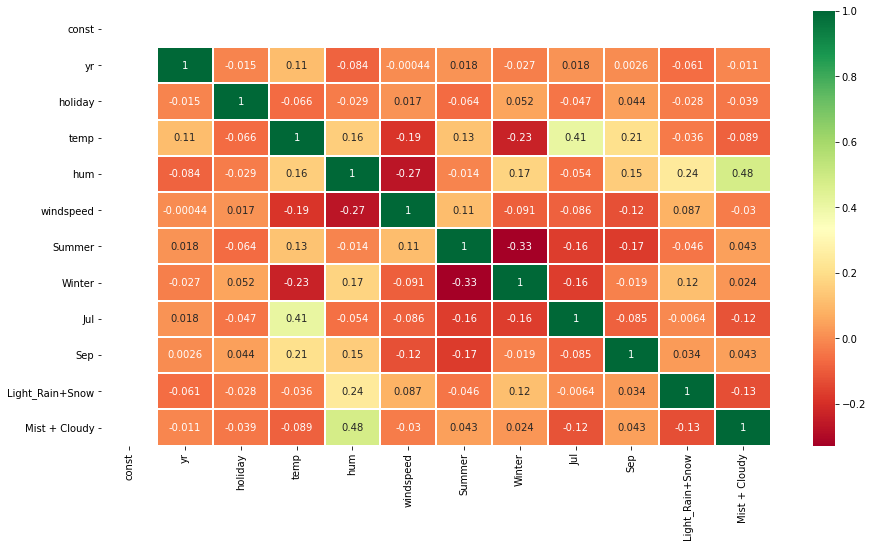

In [500]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

### Model 5

#### Dropping `hum` as it has a high correlation with `Mist+ Cloudy` and checking the model.

In [501]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

#### Rebuilding the model without `hum`

In [502]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [503]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [504]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          4.52e-186
Time:                        19:38:55   Log-Likelihood:                 493.69
No. Observations:                 510   AIC:                            -965.4
Df Residuals:                     499   BIC:                            -918.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1219      0.017      7.251      0.000       0.089       0.155
yr                  0.2322      0.008     27.972      0.000       0.216       0.249
holiday            -0.1000      0.026     -3.799      0.000      -0.152      -0.048
temp                0.5698      0.022     25.537      0.000       0.526       0.614
windspeed          -0.1540      0.025     -6.089      0.000      -0.204      -0.104
Summer              0.0803      0.011      7.303      0.000       0.059       0.102
Winter              0.1252      0.011     11.776      0.000       0.104       0.146
Jul                -0.0403      0.018     -2.182      0.030      -0.077      -0.004
Sep                 0.0919      0.016      5.577      0.000       0.060       0.124
Light_Rain+Snow    -0.2819      0.025    -11.296      0.000      -0.331      -0.233
Mist + Cloudy      -0.0794      0.009     -8.982      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       52.328   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.551
Skew:                          -0.605   Prob(JB):                     3.27e-23
Kurtosis:                       4.847   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [505]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.70
3,temp,1.50
7,Jul,1.42
5,Summer,1.33
6,Winter,1.24
8,Sep,1.19
4,windspeed,1.09
9,Light_Rain+Snow,1.05
10,Mist + Cloudy,1.04
1,yr,1.02


### Model 6

#### Dropping `Jul` as it has a high correlation with `temp` and checking the model.

In [506]:
X_train_new = X_train_new.drop(["Jul"], axis = 1)

#### Rebuilding the model without `Jul`

In [507]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [508]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [509]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          2.83e-186
Time:                        19:38:55   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1259      0.017      7.508      0.000       0.093       0.159
yr                  0.2329      0.008     27.962      0.000       0.216       0.249
holiday            -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp                0.5480      0.020     27.360      0.000       0.509       0.587
windspeed          -0.1532      0.025     -6.039      0.000      -0.203      -0.103
Summer              0.0881      0.010      8.437      0.000       0.068       0.109
Winter              0.1293      0.011     12.314      0.000       0.109       0.150
Sep                 0.1012      0.016      6.330      0.000       0.070       0.133
Light_Rain+Snow    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
Mist + Cloudy      -0.0784      0.009     -8.844      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [510]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.49
3,temp,1.20
6,Winter,1.20
5,Summer,1.19
7,Sep,1.11
4,windspeed,1.09
8,Light_Rain+Snow,1.05
9,Mist + Cloudy,1.04
1,yr,1.02
2,holiday,1.02


In [511]:
# Checking the parameters obtained
lm.params

const              0.125926
yr                 0.232861
holiday           -0.098685
temp               0.548008
windspeed         -0.153246
Summer             0.088080
Winter             0.129345
Sep                0.101195
Light_Rain+Snow   -0.282869
Mist + Cloudy     -0.078375
dtype: float64

### Final Model Interpretation

#### F-Staitsics :
    
- F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.

- F-Statistics : 271.9
- Prob (F-statistic): 2.83e-186

#### Inference: The F-Statistics value of 271.9 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation of best line fit is:

## cnt=0.125926 + (0.232861 x yr) - (0.098685 x holiday) + (0.548008 x temp) − (0.153246 x windspeed) + (0.088080 x Summer) + (0.129345 x Winter) + (0.101195 x Sep) − (0.282869 x Light_Rain+Snow) − (0.078375 x Mist + Cloudy )

#### Interpretation of coefficients :

- 1. `const` : The Constant value of ‘0.125926’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.125926 units
- 2. `yr` : A coefficient value of ‘0.232861’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.232861 units
- 3. `holiday` : A coefficient value of ‘-0.098685’ indicated that, a unit increase in workingday variable decreases the bike hire numbers by 0.098685 units
- 4. `temp` : A coefficient value of ‘0.548008’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.548008 units
- 5. `windspeed` : A coefficient value of ‘-0.153246’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.153246 units
- 6. `Summer` : A coefficient value of ‘0.088080’ indicated that a unit increase in W2_Summer variable increases the bike hire numbers by 0.088080 units
- 7. `Winter` : A coefficient value of ‘0.129345’ indicated that a unit increase in W4_Winter variable increases the bike hire numbers by 0.129345 units
- `Sep` : A coefficient value of ‘0.101195’ indicated that a unit increase in Sep variable increases the bike hire numbers by 0.101195 units
- 8. `Light_Rain+Snow` : A coefficient value of ‘-0.282869’ indicated that, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.282869 units
- 9.`Mist + Cloudy` : A coefficient value of ‘-0.078375’ indicated that a unit increase in Misty weather variable, decreases the bike hire numbers by 0.078375 units

# Step 6: Model Validation

Validating the assumption of Linear Regression Model :

- Linear Relationship
- Homoscedasticity
- Independence of residuals
- No Multicollinearity
- Normality of Errors

In [512]:
y_train_pred = lm.predict(X_train_lm)

### Linear Relationship

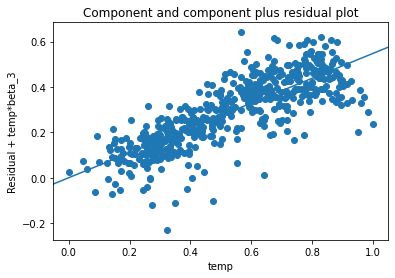

In [513]:
### Checking Linear relationship for temp variable
sm.graphics.plot_ccpr(lm, 'temp')
plt.show()

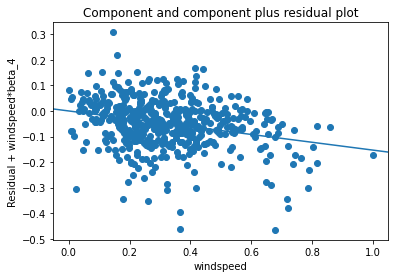

In [514]:
### Checking Linear relationship for windspeed variable
sm.graphics.plot_ccpr(lm, 'windspeed')
plt.show()

#### From the above fig. we can see that the variables are in a linear relationship with the dependent variable.

### Independence of Residuals & Homoscedasticity

Text(0.5, 0, 'Predicted Values')

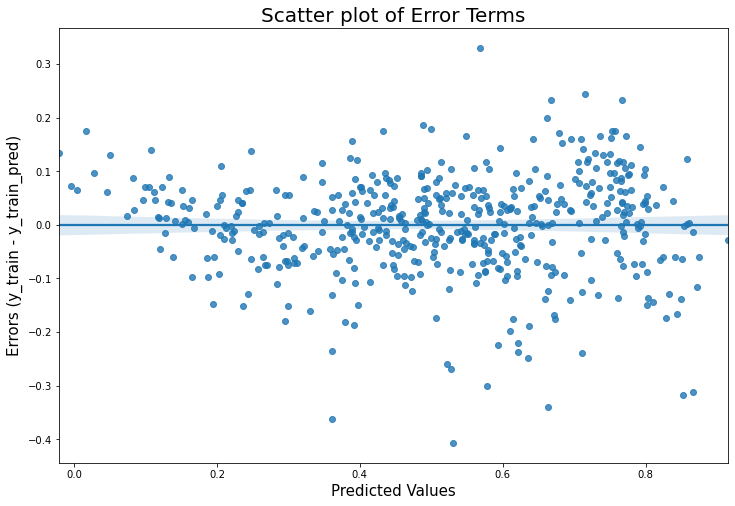

In [515]:
# Plotting scatter plot to validate assumptions 3 & 4

plt.figure(figsize=(12,8))
Errors = y_train - y_train_pred
sns.regplot(y_train_pred, Errors)
plt.title("Scatter plot of Error Terms", fontsize=20)
plt.ylabel("Errors (y_train - y_train_pred)", fontsize=15)
plt.xlabel("Predicted Values", fontsize=15)

#### From above scatterplot, we observe that there is no discernible pattern
- Thus, we can conclude that error terms/residuals are independent of each other

#### We also observe from above scatter plot that the variation of data points is not increasing significantly.
- Thus, we can conclude that our error terms have constant variance (homoscedasticity)

### Validating Multi Collinearity

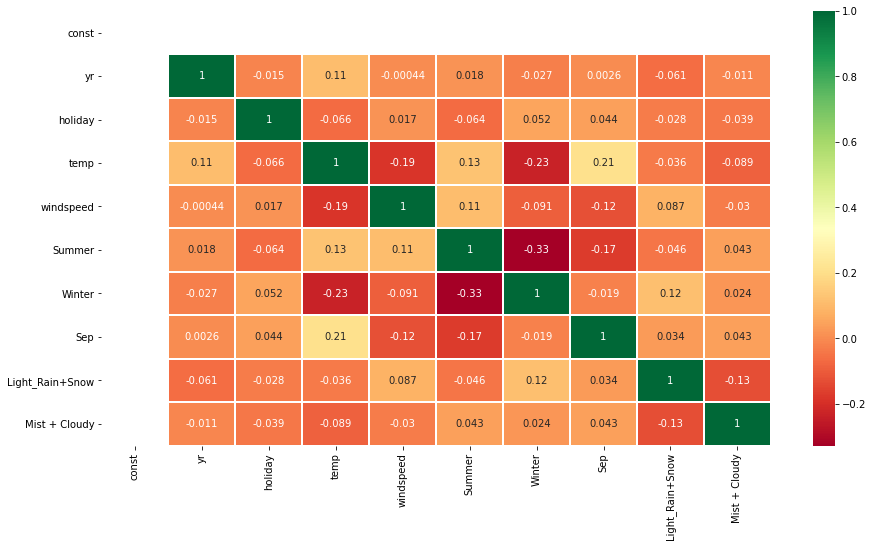

In [516]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

### Residual Analysis of the train data

In [517]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

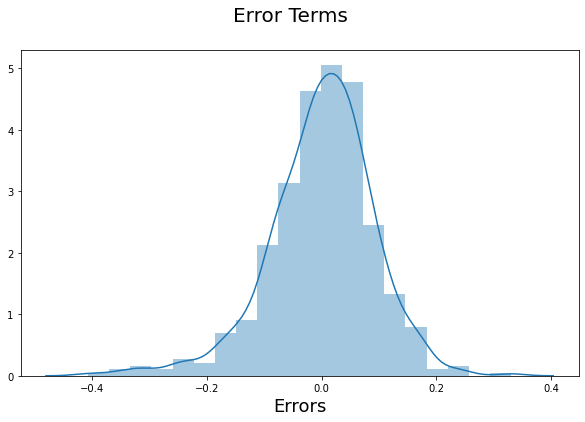

In [518]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,6))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### From above histogram, we observe that error terms/residuals are normally distributed with mean approximately zero

# Step 7: Making Predictions

#### Applying the scaling on the test sets

In [519]:
## create a list of mumeric variables
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

## 2. Fit on data
bike_test[num_vars] = scalar.transform(bike_test[num_vars])

## checking after rescaling
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_Rain+Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [520]:
## checking the summary of the variables
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_Rain+Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.027273,0.318182,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.163248,0.466833,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [521]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [522]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_Rain+Snow,Mist + Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [523]:
X_test.shape

(220, 29)

In [524]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [525]:
X_test_new.shape

(220, 30)

In [526]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [527]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            220 non-null    float64
 1   yr               220 non-null    int64  
 2   holiday          220 non-null    int64  
 3   temp             220 non-null    float64
 4   windspeed        220 non-null    float64
 5   Summer           220 non-null    uint8  
 6   Winter           220 non-null    uint8  
 7   Sep              220 non-null    uint8  
 8   Light_Rain+Snow  220 non-null    uint8  
 9   Mist + Cloudy    220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.4 KB


In [528]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

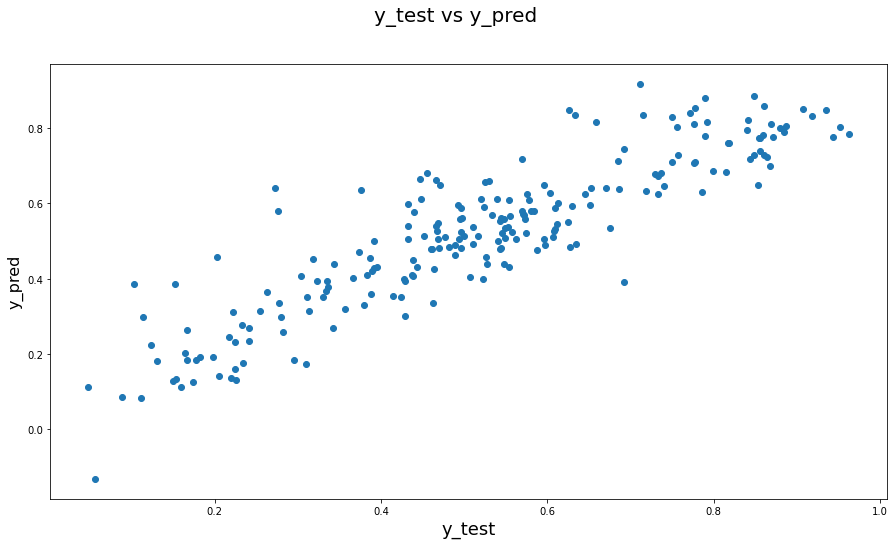

In [529]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Visualising the best-fit on the test set

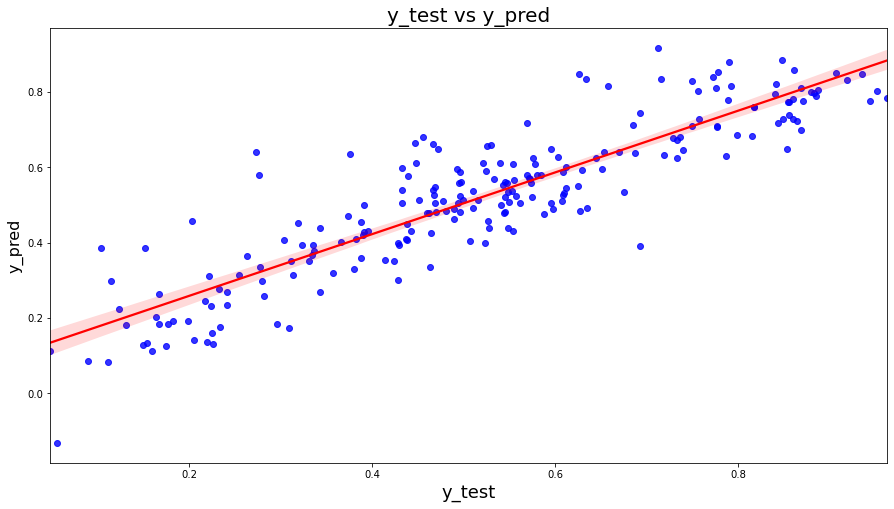

In [530]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Calculating R-squared and Adjusted R-Squared for Test set

### R2 Value

In [531]:
from sklearn.metrics import r2_score

In [532]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.7942

### Adjusted R2 Value

In [533]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7628

### Calculating RMSE

In [534]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [535]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0992

## As per the model, the top 3 variables that directly impact the totat bike rentals are:

- 1. `temp`: A coefficient of ‘0.548008’ indicated that a temperature has significant impact on bike rentals.
- 2. `Light_Rain+Snow` `(weathersit =3)`: A coefficient value of ‘-0.282869’ indicated that duriing light snow and rain less no. of bikes are rented.
- 3. `yr`: A coefficient value of ‘0.232861’ indicates that a year wise the rental numbers are increasing.

## Business Goals:
- BoomBikes can focus more on Temperature of the location.

- We can see demand for bikes was more in 2019 than 2018, so the market is growing gradually and the company needs to cater the customer demands as best as possible.

- Can focus more on Summer & Winter season, September month, Working days as they have good influence on bike rentals.

- We can see during the holidays we have negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand

- Now seeing to weathersit variable, we have got negative coefficients for Mist + Cloudy and Light_Rain+Snow... And yes we can give offers